## 第２問
一端を固定した，ばね定数 $k$ のばねに，質点とみなせる質量 $m$ の小球をつけ，滑らかな水平面上を 1 次元運動させる．
ここで小球に働く抵抗力や小球に働く熱揺動力は無視できるものとする．この時，適当な座標系を敷き，時刻 $t$ におけ
る小球の位置を $x(t)$ とすれば，物体の運動方程式は，
$m\ddot{x}(t) = −kx(t)$
と表され，物体が周期運動（単振動）する解析解を得ることができる．いま，これを数値計算を用いて解くことにしよ
う．以下の各問に答えよ．

### 2-1
$\tilde{x}$，$\tilde{t}$，$\tilde{v}$ を長さ，時間，速度に関する無次元の変数であるとし，問題にて与えた実際の物理量との関係は $x = a\tilde{x}$，
$t = t_0\tilde{t}$，$\dot{x} = v = (a/t_0)\tilde{v}$ であるとする．ここで $a[m]$，$t_0[s]$ は適当に定めた長さと時間である．上記の関係を用い
ることで運動方程式を無次元であることを示せ。

実際の物理量と無次元変数の関係は以下の通り。
$$
x = a \tilde{x}, \quad t = t_0 \tilde{t}, \quad \dot{x} = v = \frac{a}{t_0} \tilde{v}
$$

これらの関係を用いて運動方程式を書き表す。
$$
m \ddot{x}(t) = -k x(t)
$$

左辺の $\ddot{x}(t)$ は2階微分なので無次元化すると

$$
\ddot{x} = \frac{d^2 x}{dt^2} = \frac{d}{dt} \left( \frac{d x}{dt} \right) = \frac{d}{dt} \left( \frac{a \tilde{v}}{t_0} \right) = \frac{a}{t_0} \frac{d \tilde{v}}{dt}
$$

さらに時間の無次元化を使い $\frac{d}{dt}$ を $\frac{d}{d\tilde{t}}$ に置き換える
$$
\frac{d \tilde{v}}{dt} = \frac{d \tilde{v}}{d\tilde{t}} \cdot \frac{d\tilde{t}}{dt} = \frac{d \tilde{v}}{d\tilde{t}} \cdot \frac{1}{t_0}
$$

したがって、2階微分は以下のようになる
$$
\ddot{x} = \frac{a}{t_0} \frac{d}{d\tilde{t}} \left( \frac{d\tilde{x}}{d\tilde{t}} \right) = \frac{a}{t_0} \cdot \frac{1}{t_0} \frac{d^2 \tilde{x}}{d\tilde{t}^2} = \frac{a}{t_0^2} \frac{d^2 \tilde{x}}{d\tilde{t}^2}
$$

左辺を整理すると
$$
m \ddot{x}(t) = m \frac{a}{t_0^2} \frac{d^2 \tilde{x}}{d\tilde{t}^2}
$$

右辺の $ x(t) $ を無次元変数で置き換える
$$
-k x(t) = -k a \tilde{x}
$$

運動方程式は次のようになる
$$
m \frac{a}{t_0^2} \frac{d^2 \tilde{x}}{d\tilde{t}^2} = -k a \tilde{x}
$$

$ a $ を両辺から除去すると
$$
m \frac{1}{t_0^2} \frac{d^2 \tilde{x}}{d\tilde{t}^2} = -k \tilde{x}
$$

最終的に無次元化された運動方程式は以下の通り。
$$
\ddot{\tilde{x}} = - \left( \frac{k t_0^2}{m} \right) \tilde{x}
$$



### 2-2


ここで、$t_0 = \sqrt{{m}/{k}}$ とおくと単振動の運動方程式は
$$
\ddot{\tilde{x}} = - \tilde{x}
$$
となる。


### 2-3

#### 陽的 Euler 法による漸化式

速度の漸化式

$$ \tilde{v}(t + \Delta \tilde{t}) = \tilde{v}(t) - \Delta \tilde{t} \cdot \tilde{x}(t) $$

位置の漸化式

$$ \tilde{x}(t + \Delta \tilde{t}) = \tilde{x}(t) + \Delta \tilde{t} \cdot \tilde{v}(t) $$


### 2-4

半陰的 Euler 法による漸化式は次のようになる。

速度の漸化式

$$ \tilde{v}(t + \Delta \tilde{t}) = \tilde{v}(t) - \Delta \tilde{t} \cdot \tilde{x}(t) $$

位置の漸化式

$$ \tilde{x}(t + \Delta \tilde{t}) = \tilde{x}(t) + \Delta \tilde{t} \cdot \tilde{v}(t + \Delta \tilde{t}) $$

速度の更新は同じだが、位置の更新に今のステップの速度を使うのが陽的 Euler 法なのに対して、半陰的 Euler 法では位置の更新に次の時間ステップでの速度を使う。

### 2-5

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:

# Set physical parameters
a = 1.0  # initial position
v0 = 0.0  # initial velocity
dt = 0.1  # time step
t_max = 100  # max time
num_steps = int(t_max / dt)  # steps


In [7]:

# 陽的 Euler 法
x_explicit = np.zeros(num_steps + 1)
v_explicit = np.zeros(num_steps + 1)
x_explicit[0] = a
v_explicit[0] = v0

for i in range(num_steps):
    v_explicit[i + 1] = v_explicit[i] - dt * x_explicit[i]
    x_explicit[i + 1] = x_explicit[i] + dt * v_explicit[i]

# 半陰的 Euler 法
x_semi_implicit = np.zeros(num_steps + 1)
v_semi_implicit = np.zeros(num_steps + 1)
x_semi_implicit[0] = a
v_semi_implicit[0] = v0

for i in range(num_steps):
    v_semi_implicit[i + 1] = v_semi_implicit[i] - dt * x_semi_implicit[i]
    x_semi_implicit[i + 1] = x_semi_implicit[i] + dt * v_semi_implicit[i + 1]

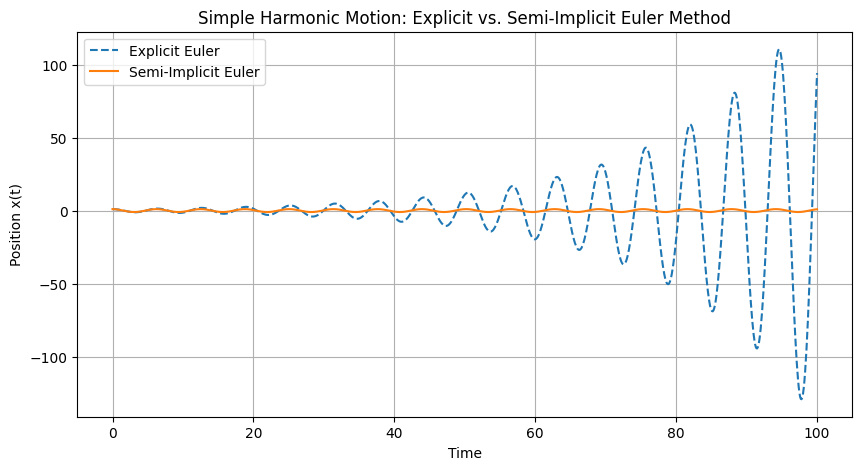

In [8]:
# time steps
time = np.arange(0, t_max + dt, dt)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(time, x_explicit, label='Explicit Euler', linestyle='--')
plt.plot(time, x_semi_implicit, label='Semi-Implicit Euler', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Position x(t)')
plt.title('Simple Harmonic Motion: Explicit vs. Semi-Implicit Euler Method')
plt.legend()
plt.grid()
plt.show()

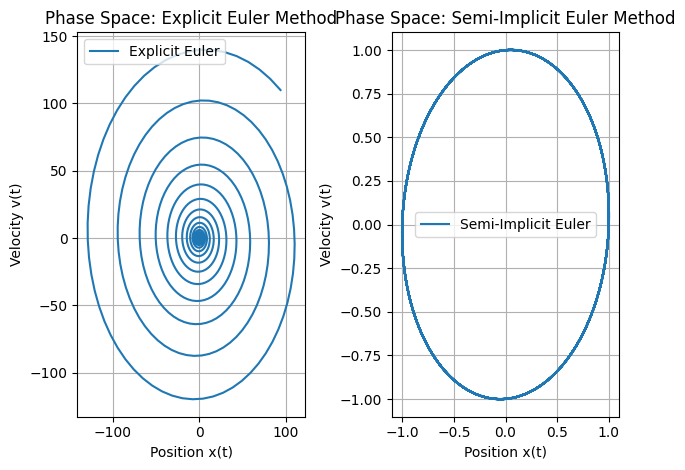

In [9]:
# 陽的 Euler 法の位相空間プロット
plt.subplot(1, 2, 1)
plt.plot(x_explicit, v_explicit, label='Explicit Euler')
plt.xlabel('Position x(t)')
plt.ylabel('Velocity v(t)')
plt.title('Phase Space: Explicit Euler Method')
plt.legend()
plt.grid()

# 半陰的 Euler 法の位相空間プロット
plt.subplot(1, 2, 2)
plt.plot(x_semi_implicit, v_semi_implicit, label='Semi-Implicit Euler')
plt.xlabel('Position x(t)')
plt.ylabel('Velocity v(t)')
plt.title('Phase Space: Semi-Implicit Euler Method')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()